In [1]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('Demo_Data/metadata_dengue_sst.csv')
data

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52,Código Municipio,Longitud,Latitud
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,16,21,15,20,30,14,5,5001,-75.588289,6.249349
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,0,0,0,0,0,0,0,5002,-75.466133,5.766415
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,5004,-76.076851,6.653536
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,5021,-75.141335,6.376063
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,0,0,1,1,1,0,0,5030,-75.700821,6.051586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,97889,Yavaraté,555,693,841,1003,1164,1275,1349,1334,...,0,0,0,0,0,0,0,97889,-69.203336,0.609142
1115,99001,Puerto Carreño,13742,14559,15346,16124,16934,17773,18635,19519,...,1,1,0,0,0,1,0,99001,-68.116825,5.998149
1116,99524,La Primavera,5190,5784,6365,6920,7496,8034,8617,9166,...,0,0,0,0,0,0,0,99524,-69.938948,5.792002
1117,99624,Santa Rosalía,3167,3378,3586,3846,4067,4325,4535,4635,...,0,0,0,0,0,0,0,99624,-70.949031,4.994947


In [2]:
import epiweeks

# Get all the columns that contain 'w' and any number between 2016 and 2018 in the column name
dengue_cols = [col for col in data.columns if '/w' in col and ('2016' in col or '2017' in col or '2018' in col)]
dengue_cols_full = [col for col in data.columns if '/w' in col]

# columns are in format '2016/w01' convert to datetime using epiweeks
dengue = data[dengue_cols]
data = data.drop(dengue_cols_full, axis=1)
# Convert the columns to datetime using epiweeks
dengue.rename(columns={col: epiweeks.Week(int(col.replace('/w', '')[:4]), int(col.replace('/w', '')[4:])).startdate() for col in dengue_cols}, inplace=True)
dengue

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_81442/3980814129.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue.rename(columns={col: epiweeks.Week(int(col.replace('/w', '')[:4]), int(col.replace('/w', '')[4:])).startdate() for col in dengue_cols}, inplace=True)


,2016-01-03,2016-01-10,2016-01-17,2016-01-24,2016-01-31,2016-02-07,2016-02-14,2016-02-21,2016-02-28,2016-03-06,...,2018-10-21,2018-10-28,2018-11-04,2018-11-11,2018-11-18,2018-11-25,2018-12-02,2018-12-09,2018-12-16,2018-12-23
0,235,274,252,262,274,266,234,258,272,189,...,24,17,20,15,41,28,12,27,17,17
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,8,5,4,7,8,4,9,7,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,0,0,3,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1116,0,0,1,1,2,1,0,0,3,3,...,0,0,0,0,0,0,0,0,0,0
1117,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Temperature Columns:
# all columns with TEMPERATURE in the name and ending with 16, 17, 18
temp_cols = [col for col in data.columns if 'TEMPERATURE' in col and ('16' in col or '17' in col or '18' in col)]
temp_cols_full = [col for col in data.columns if 'TEMPERATURE' in col]

# all columnw with PRECIPITATION in the name and ending with 16, 17, 18
precip_cols = [col for col in data.columns if 'PRECIPITATION' in col and ('16' in col or '17' in col or '18' in col)]
precip_cols_full = [col for col in data.columns if 'PRECIPITATION' in col]

# temperature data
temp = data[temp_cols]
data = data.drop(temp_cols_full, axis=1)
# precipitation data
precip = data[precip_cols]
data = data.drop(precip_cols_full, axis=1)

# rename the columns to datetime mapping month to number and assuming the day to be 1
# month 3 character abbreviation to number map lowercase
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
# Rename the columns by removing TEMPERATURE and PRECIPITATION and converting the date to datetime
temp.rename(columns={col: pd.to_datetime('20' + col[-2:] + '-' + str(month_map[col[-6:-3].lower()]) + '-01') for col in temp_cols}, inplace=True)
precip.rename(columns={col: pd.to_datetime('20' + col[-2:] + '-' + str(month_map[col[-6:-3].lower()]) + '-01') for col in precip_cols}, inplace=True)
temp.head()

,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
0,22.354770,22.693342,22.010981,22.454306,22.202557,22.160450,22.171787,22.600335,21.645379,21.301369,...,21.726171,21.124271,21.037365,21.457151,21.952168,21.719432,21.347202,20.748416,20.886703,20.936353
1,17.916817,18.074567,17.411390,17.796172,17.693125,17.648791,17.310958,17.884635,17.262656,16.924781,...,17.169984,16.471953,16.495468,17.036293,17.063302,17.103385,17.011875,16.495094,16.674297,16.627245
2,18.276007,18.490564,18.133994,18.618959,18.343619,18.268609,18.113209,18.342407,17.676377,17.456419,...,17.833994,17.378247,17.221657,17.529025,17.843157,17.512112,17.356325,16.911367,17.231535,17.080420
3,22.035873,22.390246,21.706051,22.384080,22.221606,22.105623,21.924335,22.346545,21.615760,21.264327,...,21.489558,20.985991,21.025772,21.377411,21.652374,21.425886,21.230342,20.725872,20.687894,20.574121
4,22.110703,22.463369,21.939199,22.347405,22.057070,21.804097,21.787292,22.174323,21.303802,21.022482,...,21.648314,21.020582,20.880769,21.149931,21.560988,21.380573,21.026458,20.558420,20.625113,20.717262


In [4]:
# Average dengue by year. take into account you have 2016, 2017, 2018 data so you should create a dataframe dengue_avg 
# with the average dengue cases for each year. the columns are the dates and each row is a city
years = [2016, 2017, 2018]
dengue_avg = pd.DataFrame()
for year in years:
    dengue_avg[str(year)] = dengue[[col for col in dengue.columns if str(year) in str(col)]].mean(axis=1)
dengue_avg

# average temperature by year
temp_avg = pd.DataFrame()
for year in years:
    temp_avg[str(year)] = temp[[col for col in temp.columns if str(year) in str(col)]].mean(axis=1)
temp_avg

# average precipitation by year
precip_avg = pd.DataFrame()
for year in years:
    precip_avg[str(year)] = precip[[col for col in precip.columns if str(year) in str(col)]].mean(axis=1)
precip_avg

# merge the dataframes indicating the suffixes for the columns
merged = pd.merge(dengue_avg, temp_avg, left_index=True, right_index=True, suffixes=('_dengue', ''))
merged = pd.merge(merged, precip_avg, left_index=True, right_index=True, suffixes=('_temp', '_precip'))
merged

,2016_dengue,2017_dengue,2018_dengue,2016_temp,2017_temp,2018_temp,2016_precip,2017_precip,2018_precip
0,332.807692,39.924528,22.666667,21.943911,21.350182,21.257987,170.860412,192.815909,215.531162
1,0.096154,0.018868,0.039216,17.427445,16.812016,16.765922,170.362537,189.626654,213.986592
2,0.038462,0.000000,0.019608,17.989909,17.394741,17.339569,154.819131,182.611120,194.359353
3,0.096154,0.000000,0.000000,21.773094,21.145504,21.053678,182.093695,203.085915,231.360449
4,3.769231,0.320755,0.058824,21.683445,21.088197,21.019708,161.462956,182.512327,202.977114
...,...,...,...,...,...,...,...,...,...
1114,0.000000,0.000000,0.000000,26.495327,25.959433,25.887254,302.846812,288.845788,299.388878
1115,0.615385,0.094340,0.098039,29.074172,28.353492,28.056971,225.019284,194.526000,198.746806
1116,1.384615,0.000000,0.058824,28.600824,27.925774,27.713020,216.190884,202.300431,212.506434
1117,0.269231,0.169811,0.000000,27.970317,27.318024,27.171170,214.010459,202.843428,221.696004


In [5]:
# drop columns in data that contain 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015 and 2019
data = data.drop([col for col in data.columns if '2007' in col or '2008' in col or '2009' in col or '2010' in col or '2011' in col or '2012' in col or '2013' in col or '2014' in col or '2015' in col or '2019' in col], axis=1)
data

,Municipality code,Municipality,Population2016,Population2017,Population2018,Cases2016,Cases2017,Cases2018,Age0-4(%),Age5-14(%),...,Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2,Código Municipio,Longitud,Latitud
0,5001,Medellín,2420516,2414616,2427129,17306,2100,1172,5.16,11.96,...,31.2817,26.0471,9.0279,6.4855,3.7062,1.555263,2102.057895,5001,-75.588289,6.249349
1,5002,Abejorral,19979,20047,20367,5,1,2,5.24,14.92,...,33.8306,2.0439,0.0352,0.0117,0.0000,0.002012,11.945674,5002,-75.466133,5.766415
2,5004,Abriaquí,2539,2593,2695,2,0,1,6.07,14.08,...,39.1675,4.3519,0.0946,0.1892,0.1892,0.000000,2.548276,5004,-76.076851,6.653536
3,5021,Alejandría,4543,4570,4657,5,0,0,6.59,15.73,...,38.5721,4.8215,0.1854,0.0464,0.0464,0.006623,9.092715,5021,-75.141335,6.376063
4,5030,Amagá,29006,29429,30227,196,17,3,5.42,13.36,...,42.0280,3.4086,0.1889,0.1460,0.0172,0.011765,102.752941,5030,-75.700821,6.051586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,97889,Yavaraté,1073,1027,1048,0,0,0,5.03,48.15,...,1.0101,0.0000,0.0000,0.0000,0.0000,0.000000,0.028621,97889,-69.203336,0.609142
1115,99001,Puerto Carreño,20921,21087,20936,32,5,5,10.61,20.52,...,15.3779,2.4037,0.0579,0.0145,0.0145,0.000388,0.432426,99001,-68.116825,5.998149
1116,99524,La Primavera,10098,10233,10122,72,0,3,10.37,23.27,...,5.0284,0.7782,0.0299,0.0000,0.0000,0.000000,0.113272,99524,-69.938948,5.792002
1117,99624,Santa Rosalía,4296,4083,4059,14,9,0,9.34,25.34,...,7.0053,0.2627,0.0000,0.0000,0.0000,0.000254,0.247904,99624,-70.949031,4.994947


In [6]:
# Merge with the original data
data = pd.merge(data, merged, left_index=True, right_index=True)
data

,Municipality code,Municipality,Population2016,Population2017,Population2018,Cases2016,Cases2017,Cases2018,Age0-4(%),Age5-14(%),...,Latitud,2016_dengue,2017_dengue,2018_dengue,2016_temp,2017_temp,2018_temp,2016_precip,2017_precip,2018_precip
0,5001,Medellín,2420516,2414616,2427129,17306,2100,1172,5.16,11.96,...,6.249349,332.807692,39.924528,22.666667,21.943911,21.350182,21.257987,170.860412,192.815909,215.531162
1,5002,Abejorral,19979,20047,20367,5,1,2,5.24,14.92,...,5.766415,0.096154,0.018868,0.039216,17.427445,16.812016,16.765922,170.362537,189.626654,213.986592
2,5004,Abriaquí,2539,2593,2695,2,0,1,6.07,14.08,...,6.653536,0.038462,0.000000,0.019608,17.989909,17.394741,17.339569,154.819131,182.611120,194.359353
3,5021,Alejandría,4543,4570,4657,5,0,0,6.59,15.73,...,6.376063,0.096154,0.000000,0.000000,21.773094,21.145504,21.053678,182.093695,203.085915,231.360449
4,5030,Amagá,29006,29429,30227,196,17,3,5.42,13.36,...,6.051586,3.769231,0.320755,0.058824,21.683445,21.088197,21.019708,161.462956,182.512327,202.977114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,97889,Yavaraté,1073,1027,1048,0,0,0,5.03,48.15,...,0.609142,0.000000,0.000000,0.000000,26.495327,25.959433,25.887254,302.846812,288.845788,299.388878
1115,99001,Puerto Carreño,20921,21087,20936,32,5,5,10.61,20.52,...,5.998149,0.615385,0.094340,0.098039,29.074172,28.353492,28.056971,225.019284,194.526000,198.746806
1116,99524,La Primavera,10098,10233,10122,72,0,3,10.37,23.27,...,5.792002,1.384615,0.000000,0.058824,28.600824,27.925774,27.713020,216.190884,202.300431,212.506434
1117,99624,Santa Rosalía,4296,4083,4059,14,9,0,9.34,25.34,...,4.994947,0.269231,0.169811,0.000000,27.970317,27.318024,27.171170,214.010459,202.843428,221.696004


In [7]:
data.dropna(inplace=True)
data

,Municipality code,Municipality,Population2016,Population2017,Population2018,Cases2016,Cases2017,Cases2018,Age0-4(%),Age5-14(%),...,Latitud,2016_dengue,2017_dengue,2018_dengue,2016_temp,2017_temp,2018_temp,2016_precip,2017_precip,2018_precip
0,5001,Medellín,2420516,2414616,2427129,17306,2100,1172,5.16,11.96,...,6.249349,332.807692,39.924528,22.666667,21.943911,21.350182,21.257987,170.860412,192.815909,215.531162
1,5002,Abejorral,19979,20047,20367,5,1,2,5.24,14.92,...,5.766415,0.096154,0.018868,0.039216,17.427445,16.812016,16.765922,170.362537,189.626654,213.986592
2,5004,Abriaquí,2539,2593,2695,2,0,1,6.07,14.08,...,6.653536,0.038462,0.000000,0.019608,17.989909,17.394741,17.339569,154.819131,182.611120,194.359353
3,5021,Alejandría,4543,4570,4657,5,0,0,6.59,15.73,...,6.376063,0.096154,0.000000,0.000000,21.773094,21.145504,21.053678,182.093695,203.085915,231.360449
4,5030,Amagá,29006,29429,30227,196,17,3,5.42,13.36,...,6.051586,3.769231,0.320755,0.058824,21.683445,21.088197,21.019708,161.462956,182.512327,202.977114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,97889,Yavaraté,1073,1027,1048,0,0,0,5.03,48.15,...,0.609142,0.000000,0.000000,0.000000,26.495327,25.959433,25.887254,302.846812,288.845788,299.388878
1115,99001,Puerto Carreño,20921,21087,20936,32,5,5,10.61,20.52,...,5.998149,0.615385,0.094340,0.098039,29.074172,28.353492,28.056971,225.019284,194.526000,198.746806
1116,99524,La Primavera,10098,10233,10122,72,0,3,10.37,23.27,...,5.792002,1.384615,0.000000,0.058824,28.600824,27.925774,27.713020,216.190884,202.300431,212.506434
1117,99624,Santa Rosalía,4296,4083,4059,14,9,0,9.34,25.34,...,4.994947,0.269231,0.169811,0.000000,27.970317,27.318024,27.171170,214.010459,202.843428,221.696004


### Prepare Geospatial Data

In [8]:
import geopandas as gpd
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data.Longitud, data.Latitud),
    crs="EPSG:4326"  # WGS84 Latitude/Longitude
)
gdf

,Municipality code,Municipality,Population2016,Population2017,Population2018,Cases2016,Cases2017,Cases2018,Age0-4(%),Age5-14(%),...,2016_dengue,2017_dengue,2018_dengue,2016_temp,2017_temp,2018_temp,2016_precip,2017_precip,2018_precip,geometry
0,5001,Medellín,2420516,2414616,2427129,17306,2100,1172,5.16,11.96,...,332.807692,39.924528,22.666667,21.943911,21.350182,21.257987,170.860412,192.815909,215.531162,POINT (-75.58829 6.24935)
1,5002,Abejorral,19979,20047,20367,5,1,2,5.24,14.92,...,0.096154,0.018868,0.039216,17.427445,16.812016,16.765922,170.362537,189.626654,213.986592,POINT (-75.46613 5.76641)
2,5004,Abriaquí,2539,2593,2695,2,0,1,6.07,14.08,...,0.038462,0.000000,0.019608,17.989909,17.394741,17.339569,154.819131,182.611120,194.359353,POINT (-76.07685 6.65354)
3,5021,Alejandría,4543,4570,4657,5,0,0,6.59,15.73,...,0.096154,0.000000,0.000000,21.773094,21.145504,21.053678,182.093695,203.085915,231.360449,POINT (-75.14133 6.37606)
4,5030,Amagá,29006,29429,30227,196,17,3,5.42,13.36,...,3.769231,0.320755,0.058824,21.683445,21.088197,21.019708,161.462956,182.512327,202.977114,POINT (-75.70082 6.05159)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,97889,Yavaraté,1073,1027,1048,0,0,0,5.03,48.15,...,0.000000,0.000000,0.000000,26.495327,25.959433,25.887254,302.846812,288.845788,299.388878,POINT (-69.20334 0.60914)
1115,99001,Puerto Carreño,20921,21087,20936,32,5,5,10.61,20.52,...,0.615385,0.094340,0.098039,29.074172,28.353492,28.056971,225.019284,194.526000,198.746806,POINT (-68.11682 5.99815)
1116,99524,La Primavera,10098,10233,10122,72,0,3,10.37,23.27,...,1.384615,0.000000,0.058824,28.600824,27.925774,27.713020,216.190884,202.300431,212.506434,POINT (-69.93895 5.79200)
1117,99624,Santa Rosalía,4296,4083,4059,14,9,0,9.34,25.34,...,0.269231,0.169811,0.000000,27.970317,27.318024,27.171170,214.010459,202.843428,221.696004,POINT (-70.94903 4.99495)


In [ ]:
data.to_csv('data.csv', index=False)

### Calculate Spatial Autocorrelation (SAC)

In [9]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

# Create a spatial weights matrix
w = weights.DistanceBand.from_dataframe(gdf, threshold=1, binary=True, silence_warnings=True)

# Calculate Moran's I for an attribute, e.g., temperature
variable = 'Population2016'  # Update this to the correct temperature column in your dataset
moran = esda.Moran(gdf[variable], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# Optional: Plot Moran's I result
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()


Moran's I: 0.004074484087888983, p-value: 0.072


/Users/davidrestrepo/miniforge3/envs/nlp_violence/lib/python3.9/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


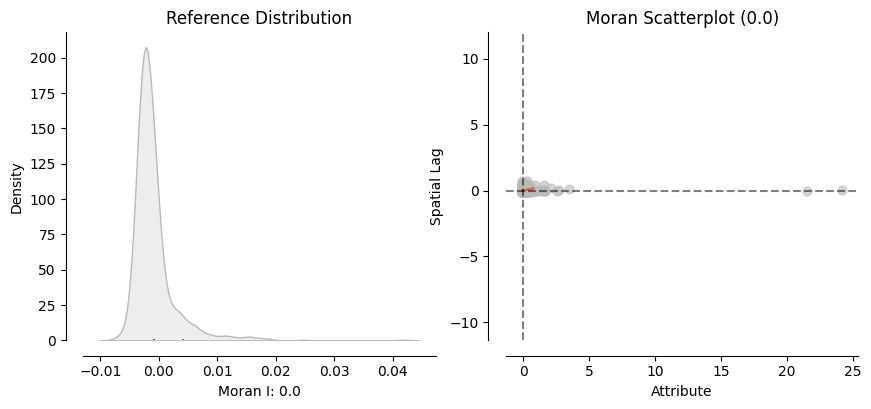

In [ ]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

# Create a spatial weights matrix
w = weights.DistanceBand.from_dataframe(gdf, threshold=1, binary=True, silence_warnings=True)

# Calculate Moran's I for an attribute, e.g., temperature
variable = '2016_dengue'  # Update this to the correct temperature column in your dataset
moran = esda.Moran(gdf[variable], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# Optional: Plot Moran's I result
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()


Moran's I: 0.502900012357551, p-value: 0.001


/Users/davidrestrepo/miniforge3/envs/nlp_violence/lib/python3.9/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


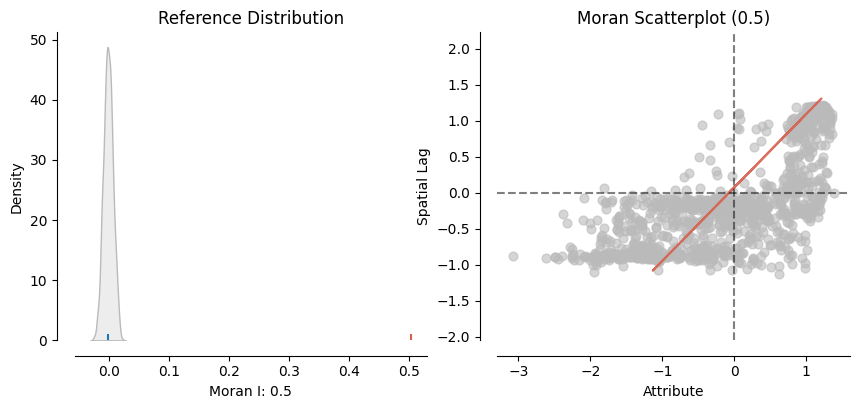

In [ ]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

# Create a spatial weights matrix
w = weights.DistanceBand.from_dataframe(gdf, threshold=1, binary=True, silence_warnings=True)

# Calculate Moran's I for an attribute, e.g., temperature
variable = '2016_temp'  # Update this to the correct temperature column in your dataset
moran = esda.Moran(gdf[variable], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# Optional: Plot Moran's I result
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()

Moran's I: 0.525267516848103, p-value: 0.001


/Users/davidrestrepo/miniforge3/envs/nlp_violence/lib/python3.9/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


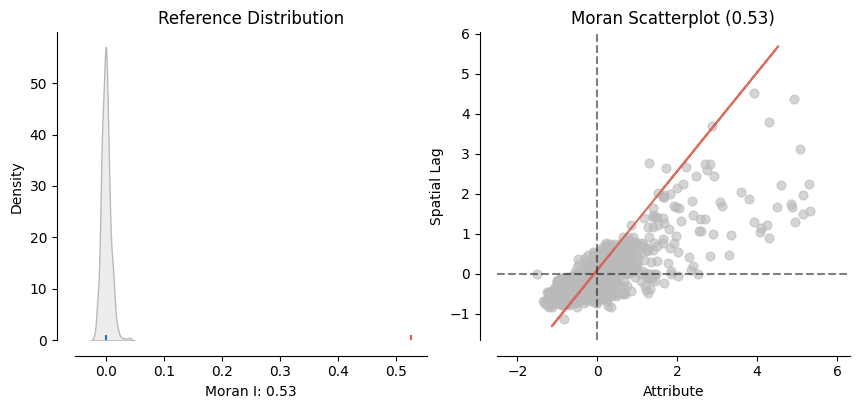

In [ ]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

# Create a spatial weights matrix
w = weights.DistanceBand.from_dataframe(gdf, threshold=1, binary=True, silence_warnings=True)

# Calculate Moran's I for an attribute, e.g., temperature
variable = '2016_precip'  # Update this to the correct temperature column in your dataset
moran = esda.Moran(gdf[variable], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# Optional: Plot Moran's I result
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()

Moran's I: 0.19449602254754716, p-value: 0.001


/Users/davidrestrepo/miniforge3/envs/nlp_violence/lib/python3.9/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


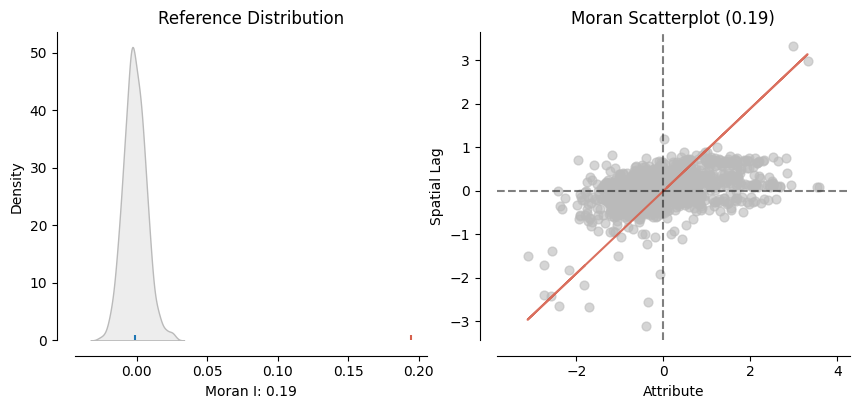

In [ ]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

# Create a spatial weights matrix
w = weights.DistanceBand.from_dataframe(gdf, threshold=1, binary=True, silence_warnings=True)

# Calculate Moran's I for an attribute, e.g., temperature
variable = 'Secondary/HigherEducation(%)'  # Update this to the correct temperature column in your dataset
moran = esda.Moran(gdf[variable], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# Optional: Plot Moran's I result
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()

Moran's I: 0.2975228881053046, p-value: 0.001


/Users/davidrestrepo/miniforge3/envs/nlp_violence/lib/python3.9/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


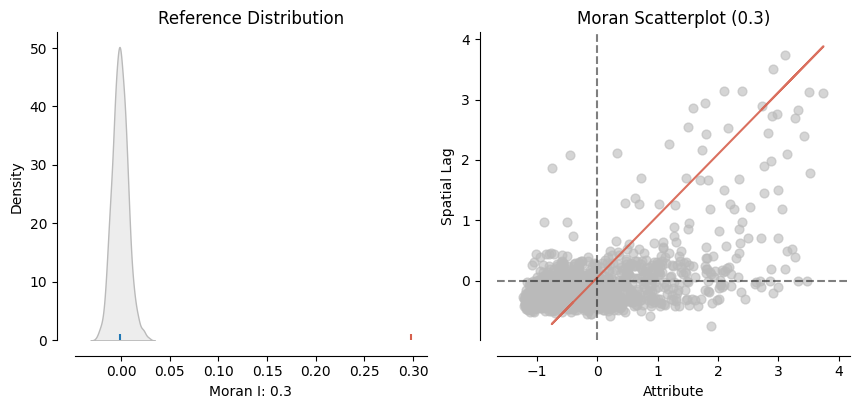

In [ ]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

# Create a spatial weights matrix
w = weights.DistanceBand.from_dataframe(gdf, threshold=1, binary=True, silence_warnings=True)

# Calculate Moran's I for an attribute, e.g., temperature
variable = 'Householdswithoutwateraccess(%)'  # Update this to the correct temperature column in your dataset
moran = esda.Moran(gdf[variable], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# Optional: Plot Moran's I result
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()

### Spatial Stratified Heterogeneity (SSH)

In [ ]:
import pandas as pd

# Define strata based on population quantiles for the example
data['strata'] = pd.qcut(data['Population2016'], q=10, labels=False)  # 4 quantiles for simplicity

# Calculate the overall mean
overall_mean = data['2016_dengue'].mean()

# Calculate the total sum of squares (SST)
SST = ((data['2016_dengue'] - overall_mean)**2).sum()

# Calculate the within sum of squares (SSW)
SSW = data.groupby('strata')['2016_dengue'].var().sum()

# Calculate the q-statistic for SSH
q_statistic = 1 - (SSW / SST)

print(f"The q-statistic for SSH is: {q_statistic}")

The q-statistic for SSH is: 0.9914716436791545


In [ ]:
import pandas as pd

# Define strata based on population quantiles for the example
data['strata'] = pd.qcut(data['Latitud'], q=2, labels=False)  # 4 quantiles for simplicity

# Calculate the overall mean
overall_mean = data['2016_dengue'].mean()

# Calculate the total sum of squares (SST)
SST = ((data['2016_dengue'] - overall_mean)**2).sum()

# Calculate the within sum of squares (SSW)
SSW = data.groupby('strata')['2016_dengue'].var().sum()

# Calculate the q-statistic for SSH
q_statistic = 1 - (SSW / SST)

print(f"The q-statistic for SSH is: {q_statistic}")

The q-statistic for SSH is: 0.9982080709936876


In [ ]:
import pandas as pd

# Define strata based on population quantiles for the example
data['strata'] = pd.qcut(data['2016_precip'], q=4, labels=False)  # 4 quantiles for simplicity

# Calculate the overall mean
overall_mean = data['2017_dengue'].mean()

# Calculate the total sum of squares (SST)
SST = ((data['2017_dengue'] - overall_mean)**2).sum()

# Calculate the within sum of squares (SSW)
SSW = data.groupby('strata')['2017_dengue'].var().sum()

# Calculate the q-statistic for SSH
q_statistic = 1 - (SSW / SST)

print(f"The q-statistic for SSH is: {q_statistic}")

The q-statistic for SSH is: 0.9964150556737273


In [ ]:
data.columns

Index(['Municipality code', 'Municipality', 'Population2016', 'Population2017',
       'Population2018', 'Cases2016', 'Cases2017', 'Cases2018', 'Age0-4(%)',
       'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)',
       'IndianPopulation(%)', 'PeoplewithDisabilities(%)',
       'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)',
       'Employedpopulation(%)', 'Unemployedpopulation(%)',
       'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)',
       'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)',
       'Buildingstratification1(%)', 'Buildingstratification2(%)',
       'Buildingstratification3(%)', 'Buildingstratification4(%)',
       'Buildingstratification5(%)', 'Buildingstratification6(%)',
       'NumberofhospitalsperKm2', 'NumberofhousesperKm2', 'Código Municipio',
       'Longitud', 'Latitud', '2016_dengue', '2017_dengue', '2018_dengue',
       '2016_temp', '2017_temp', '2018_temp', '2016_precip', '20